### Import dependencies

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/heart_cleveland_upload.csv')

### Data description

**There are 13 attributes (and 1 target)**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
14. condition: 0 = no disease, 1 = disease

In [4]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [25]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
dtype: int64

In [28]:
y = df['condition']

X = df.drop(['condition'], axis = 1)

In [29]:
print(f'X : {X.shape}')

X : (297, 17)


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,cp_0,cp_1,cp_2,cp_3
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279,0.077441,0.164983,0.279461,0.478114
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340,0.267741,0.371792,0.449492,0.500364
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


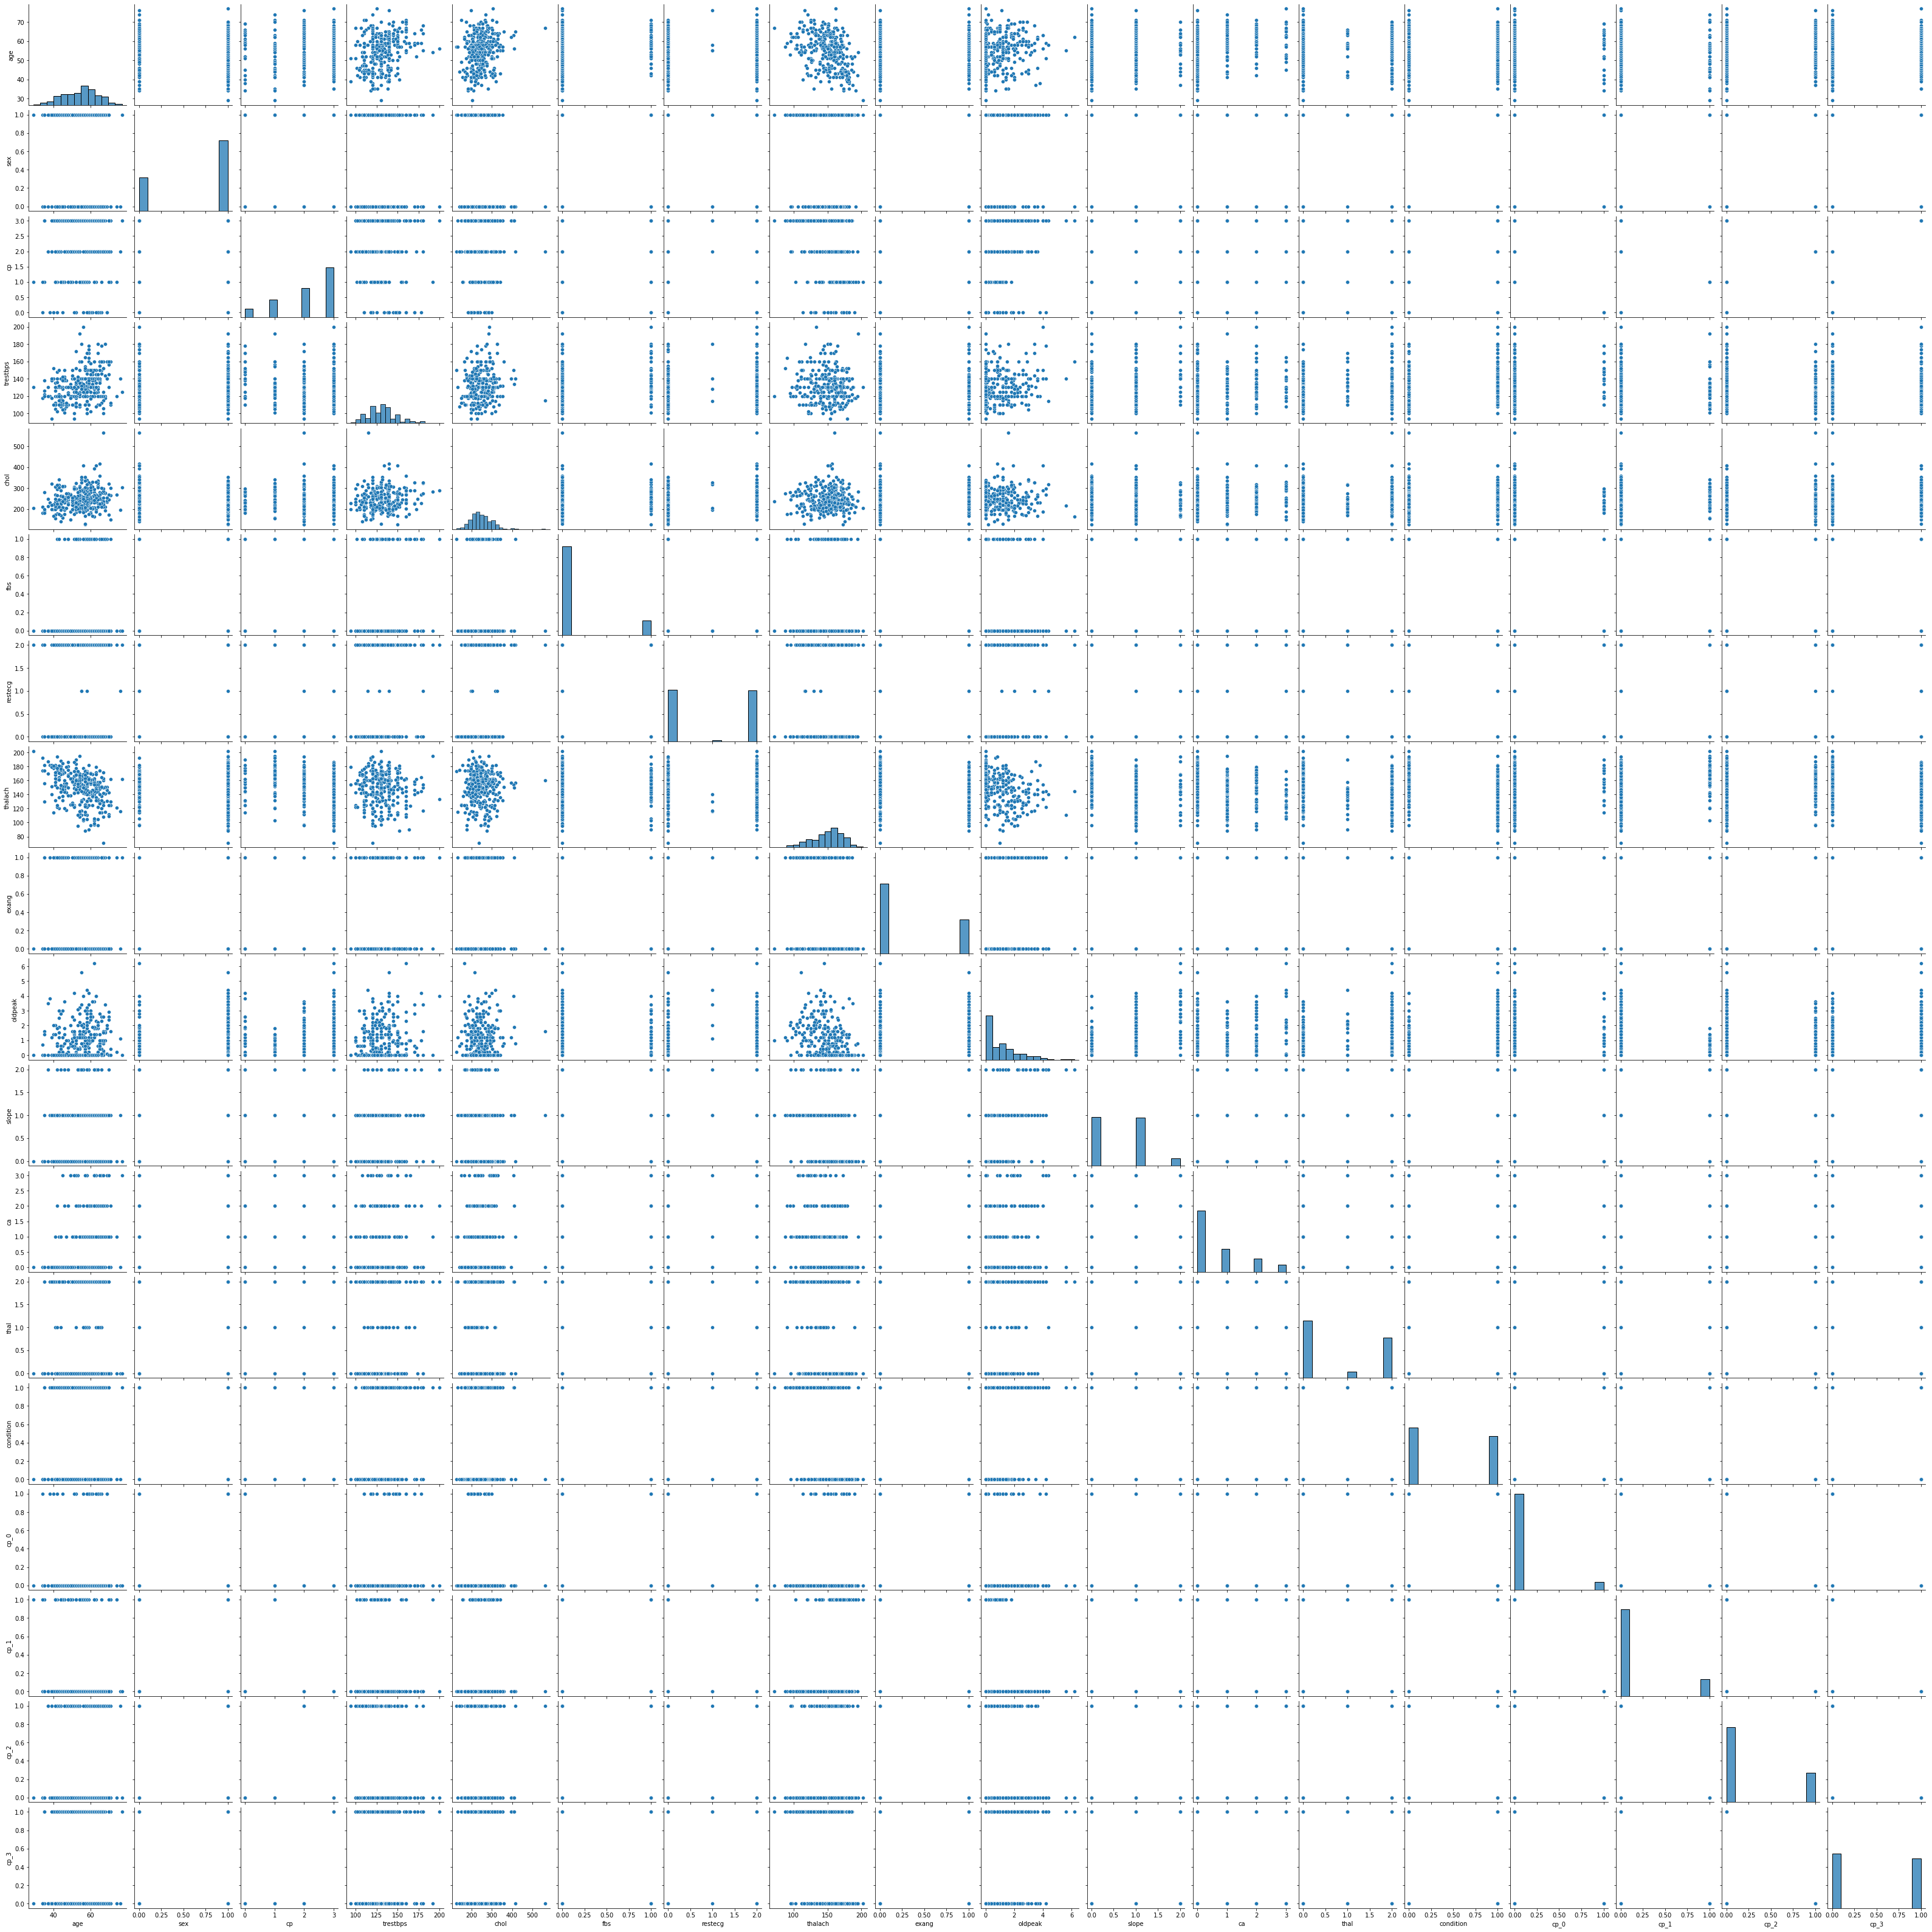

In [33]:
sns.pairplot(df)

In [36]:
df["condition"].value_counts()

0    160
1    137
Name: condition, dtype: int64

/Users/kr.sivakov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

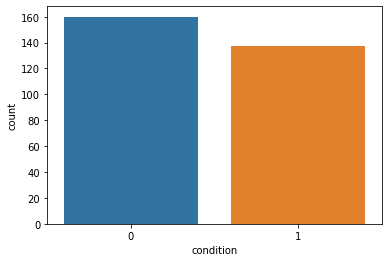

In [37]:
sns.countplot(df["condition"])

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
X = df.drop("condition", axis=1).values
y = df.condition

def modelClassification():
        models = [
            ("Logistic Regression",LogisticRegression()),
            ("KNeighborsClassifier",KNeighborsClassifier()),
            ("DecisionTreeClassifier",DecisionTreeClassifier()),
            ("GaussianNB",GaussianNB())
        ]
        for name, model in models:
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            cv_result = cross_val_score(model, X_train, y_train, cv = 10, scoring = "accuracy")
            class_report = classification_report(y_test, y_pred)
            f1_Score = f1_score(y_test, y_pred)  
            print("\n\n",name)
            print("\nCV Mean: {}\n\nClassification Report:\n{}\nPrecision Score: {}\nF1 Score: {}\n".format(cv_result.mean(), class_report, precision_score, f1_Score))
            sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = ".2f")
            plt.title(name)
            plt.show()

            model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
            fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
            plt.figure()
            plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
            plt.plot([0, 1], [0, 1], 'r--')
            plt.xlim(([0.0, 1.0]))
            plt.ylim(([0.0, 1.05]))
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC {}'.format(name))
            plt.show()



 Logistic Regression

CV Mean: 0.8495238095238096

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        48
           1       0.78      0.86      0.82        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90

Precision Score: <function precision_score at 0x7f8a623ae0d0>
F1 Score: 0.8181818181818182



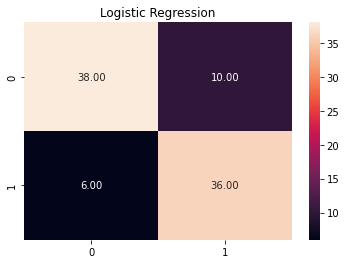

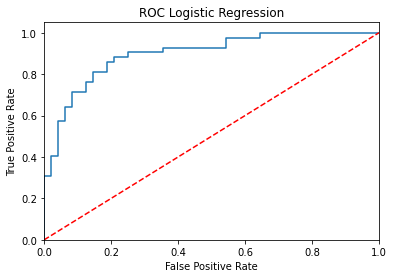



 KNeighborsClassifier

CV Mean: 0.6864285714285715

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        48
           1       0.57      0.48      0.52        42

    accuracy                           0.59        90
   macro avg       0.59      0.58      0.58        90
weighted avg       0.59      0.59      0.58        90

Precision Score: <function precision_score at 0x7f8a623ae0d0>
F1 Score: 0.5194805194805195



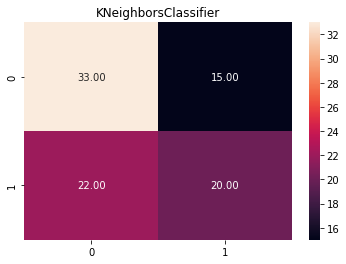

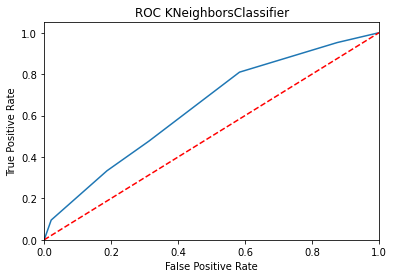



 DecisionTreeClassifier

CV Mean: 0.7047619047619047

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        48
           1       0.64      0.76      0.70        42

    accuracy                           0.69        90
   macro avg       0.70      0.69      0.69        90
weighted avg       0.70      0.69      0.69        90

Precision Score: <function precision_score at 0x7f8a623ae0d0>
F1 Score: 0.6956521739130435



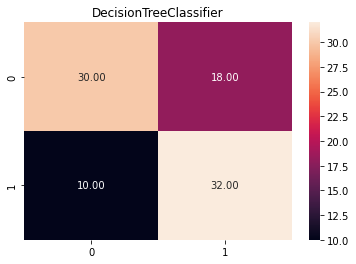

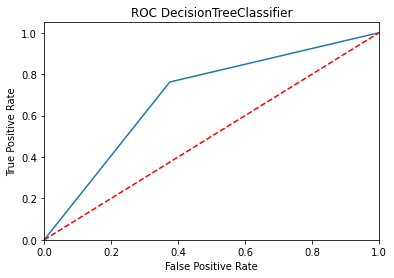



 GaussianNB

CV Mean: 0.8202380952380952

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.85      0.83      0.84        42

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90

Precision Score: <function precision_score at 0x7f8a623ae0d0>
F1 Score: 0.8433734939759037



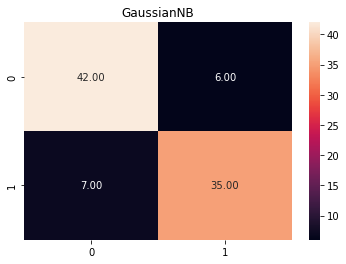

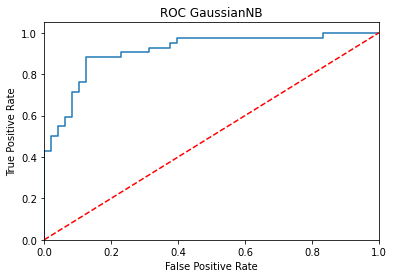

In [49]:
modelClassification()